In [5]:
import os
import datetime

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

os.environ['RLTRADER_BASE'] = 'D:\\dev\\rltrader'
from quantylab.rltrader import data_manager


years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')


def calc_mdd(list_x, list_pv):
    """
    MDD(Maximum Draw-Down) 계산
    :param list_pv: 포트폴리오 가치 리스트
    :return:
    """
    list_x = [datetime.datetime.strptime(date, '%Y%m%d').date() for date in list_x]
    arr_pv = np.array(list_pv)
    peak_lower = np.argmax(np.maximum.accumulate(arr_pv) - arr_pv)
    peak_upper = np.argmax(arr_pv[:peak_lower])
    
    idx_min = np.argmin(arr_pv)
    idx_max = np.argmax(arr_pv)

    _, ax = plt.subplots()
    ax.plot(list_x, arr_pv, color='gray')
    ax.plot([list_x[peak_upper], list_x[peak_lower]], [arr_pv[peak_upper], arr_pv[peak_lower]], '-', color='blue')
    ax.plot([list_x[idx_min]], [arr_pv[idx_min]], 'v', color='blue')
    ax.plot([list_x[idx_max]], [arr_pv[idx_max]], '^', color='red')
    
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_locator(months)
    
    plt.show()

    return (arr_pv[peak_lower] - arr_pv[peak_upper]) / arr_pv[peak_upper]

In [6]:
codes = [
    '005930',  # 삼성전자
    '005380',  # 현대차
    '035720',  # 카카오
]

56,700
37,450


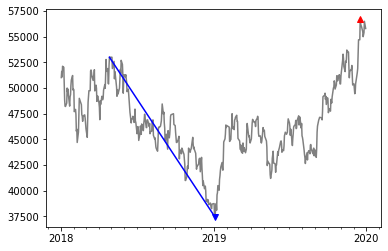

-29%
164,000
92,800


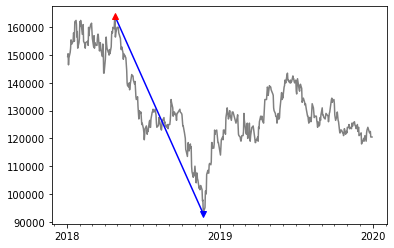

-43%
31,900
17,520


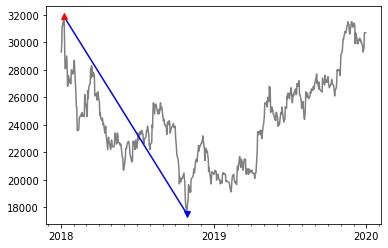

-45%


In [7]:
for code in codes:
    chart_data, _ = data_manager.load_data(code, date_from='20180101', date_to='20191231', ver='v3')
    print('{:,}'.format(chart_data['close'].max()))
    print('{:,}'.format(chart_data['close'].min()))
    print('{:.0f}%'.format(round(calc_mdd(chart_data['date'], chart_data['close']) * 100)))

91,000
42,500


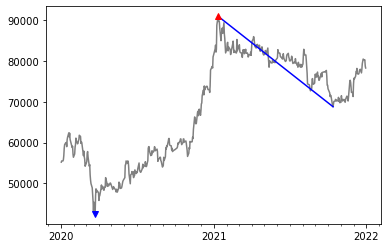

-24%
267,500
65,900


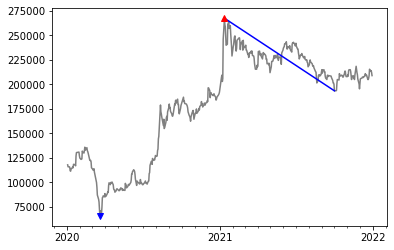

-28%
169,500
26,800


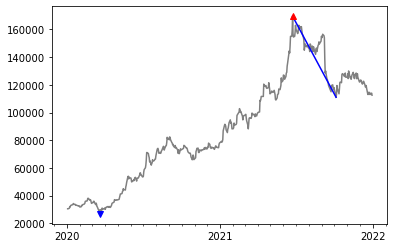

-35%


In [8]:
for code in codes:
    chart_data, _ = data_manager.load_data(code, date_from='20200101', date_to='20211231', ver='v3')
    print('{:,}'.format(chart_data['close'].max()))
    print('{:,}'.format(chart_data['close'].min()))
    print('{:.0f}%'.format(round(calc_mdd(chart_data['date'], chart_data['close']) * 100)))